In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Q1

In [2]:
wait_time = [ 1, 4, 1, 8, 11, 4, 12, 4, 3, 11, 2, 6, 11, 6, 
             0, 9, 4, 3, 2, 9, 7, 8, 8, 6, 9, 1, 5, 4, 4, 4]

##(a)

In [3]:
print("Sample mean:", np.mean(wait_time))

Sample mean: 5.566666666666666


In [4]:
print("(Biased) sample standard deviation:", np.std(wait_time))

(Biased) sample standard deviation: 3.3434845429415234


##(b)

In [5]:
print("Unbiased estimate of population standard deviation:", np.std(wait_time, ddof=1))

Unbiased estimate of population standard deviation: 3.40064226523343


##(c)

In [6]:
print("Standard error of the mean:", np.std(wait_time, ddof=1)/np.sqrt(30))

Standard error of the mean: 0.6208694928912719


##(d)

Note that $\bar{X} \rightarrow _dN(\mu, \dfrac{\sigma^2}{n})$.\
By putting $\mu=\dfrac{167}{30}\approx5.567$ and $\dfrac{\sigma^2}{n}\approx0.385479$, we can approximate $\bar{X}$ by $N(5.567, 0.385479)$.
The corresponding pdf is plotted below: 

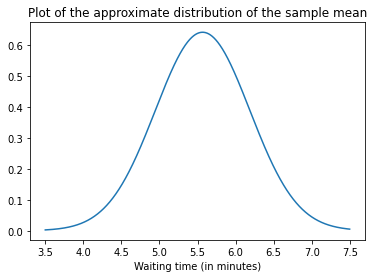

In [7]:
x = np.arange(3.5, 7.5, 0.001)
y = stats.norm.pdf(x, loc=167/30, scale=np.sqrt(0.385478927))

plt.title("Plot of the approximate distribution of the sample mean")
plt.xlabel("Waiting time (in minutes)")
plt.plot(x, y)
plt.show()

##(e)

Required 90% interval = $[\bar{X}-z_{0.05}\dfrac{\sigma}{\sqrt{n}}, \bar{X}+z_{0.05}\dfrac{\sigma}{\sqrt{n}}]$, \
where $z_{0.05}\approx1.645$.

In [8]:
print("Required 90% confidence interval:", stats.norm.interval(alpha=0.9, loc=167/30, scale=np.sqrt(0.385478927)))

Required 90% confidence interval: (4.545427229689924, 6.587906103643409)


#Q2

##(a)

In [9]:
np.random.seed(0)
first_bootstrapped_sample = np.random.choice(wait_time, replace=True, size=30)
print(first_bootstrapped_sample)
print("Mean:", np.mean(first_bootstrapped_sample))
print("Standard deviation:", np.std(first_bootstrapped_sample))

[11  9  8  1  8  4  8  4 11  9  8  2 11  6 12  9  9 11  5  4 12  4  6  0
  9  3  4  1  6  3]
Mean: 6.6
Standard deviation: 3.4794635601866366


##(b)

In [10]:
np.random.seed(0)
bootstrapped_sample = np.random.choice(wait_time, replace=True, size=(1000, 30))
for i in range(1000):
  print(f"Mean of sample {i+1}: {np.mean(bootstrapped_sample[i])}")

Mean of sample 1: 6.6
Mean of sample 2: 5.633333333333334
Mean of sample 3: 5.666666666666667
Mean of sample 4: 6.8
Mean of sample 5: 4.3
Mean of sample 6: 4.933333333333334
Mean of sample 7: 5.366666666666666
Mean of sample 8: 5.266666666666667
Mean of sample 9: 7.166666666666667
Mean of sample 10: 5.133333333333334
Mean of sample 11: 5.733333333333333
Mean of sample 12: 4.633333333333334
Mean of sample 13: 5.566666666666666
Mean of sample 14: 5.566666666666666
Mean of sample 15: 5.2
Mean of sample 16: 5.7
Mean of sample 17: 5.966666666666667
Mean of sample 18: 5.666666666666667
Mean of sample 19: 6.5
Mean of sample 20: 6.5
Mean of sample 21: 6.033333333333333
Mean of sample 22: 4.7
Mean of sample 23: 5.933333333333334
Mean of sample 24: 6.4
Mean of sample 25: 4.833333333333333
Mean of sample 26: 6.066666666666666
Mean of sample 27: 5.766666666666667
Mean of sample 28: 4.366666666666666
Mean of sample 29: 4.633333333333334
Mean of sample 30: 5.4
Mean of sample 31: 6.0
Mean of sample 3

In [11]:
print("Mean:", np.mean(bootstrapped_sample))
print("Standard deviation:", np.std(bootstrapped_sample))

Mean: 5.567433333333334
Standard deviation: 3.339748405527312


##(c)

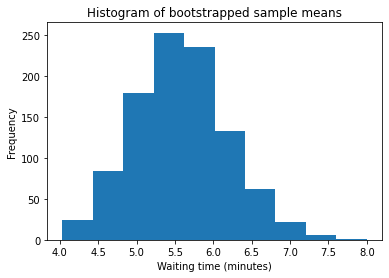

In [12]:
means = [np.mean(i) for i in bootstrapped_sample]
plt.hist(means)
plt.title("Histogram of bootstrapped sample means")
plt.xlabel("Waiting time (minutes)")
plt.ylabel("Frequency")
plt.show()

##(d)

In [13]:
print("Lower bound of 95% confidence interval:", np.quantile(means, q=0.025))

Lower bound of 95% confidence interval: 4.433333333333334


In [14]:
print("Lower bound of 95% confidence interval:", np.quantile(means, q=0.975))

Lower bound of 95% confidence interval: 6.834166666666666


#Q3

In [15]:
girls_scores = [77, 95, 89, 94, 99, 91, 90, 77, 85, 90, 
                93, 96, 87, 77, 85, 98, 83, 89, 98, 72]
boys_scores = [91, 65, 87, 90, 84, 77, 76, 91, 75, 71, 
               89, 97, 59, 84, 92, 87, 90, 79, 96, 89]

##(a)

In [16]:
print("Difference of group mean:", np.mean(girls_scores)-np.mean(boys_scores))

Difference of group mean: 4.799999999999997


In [17]:
print("Unbiased estimate of standard deviation for girls:", np.std(girls_scores, ddof=1))

Unbiased estimate of standard deviation for girls: 7.866484535506849


In [18]:
print("Unbiased estimate of standard deviation for boys:", np.std(boys_scores, ddof=1))

Unbiased estimate of standard deviation for boys: 10.215957589657673


##(b)

Pooled standard deviation: $s_p=\sqrt{\dfrac{(n_A-1)S_A^2+(n_B-1)S_B^2}{n_A+n_B-2}}$, where $S_A^2$ and $S_B^2$ are unbiased estimates for variances in groups A and B.

In [32]:
n_a = len(girls_scores)
n_b = len(boys_scores)
s_p = np.sqrt(((n_a-1)*(np.std(girls_scores, ddof=1)**2)+(n_b-1)*(np.std(boys_scores, ddof=1)**2))/(n_a+n_b-2))

print("Pooled standard deviation:", s_p)

Pooled standard deviation: 9.117219105106903


##(c)

t-statistic: $t=\dfrac{\bar{x}_A-\bar{x}_B}{\sigma}$, where $\sigma=s_p\sqrt{\dfrac{1}{n_A}+\dfrac{1}{n_B}}$.

In [33]:
sigma = s_p*np.sqrt(1/n_a+1/n_b)
t = (np.mean(girls_scores)-np.mean(boys_scores))/sigma
print("t statistic:", t)

t statistic: 1.6648643181456406


##(d)

In [34]:
stats.ttest_ind(girls_scores, boys_scores)

Ttest_indResult(statistic=1.6648643181456408, pvalue=0.10416515824136677)

The returned t-statistic is equal to the one calculated in (c).

#Q4

##(a)

Under the assumption that the null hypothesis (distribution) is true, the distribution of the p-value exactly follows a uniform distribution between 0 and 1.

In [22]:
print("Probability to observe p<0.05 is", 0.05)

Probability to observe p<0.05 is 0.05


##(b)

$P$(at least one test $< 0.05$) = $1-P$(no tests $< 0.05$)

In [23]:
print("Required probability:", 1-0.95**20)

Required probability: 0.6415140775914581


#Q5

##(a)

In [24]:
print("Standardized effect size:", 5/10)

Standardized effect size: 0.5


#(b)

In [25]:
print("Required power:", TTestIndPower().power(effect_size=0.5, nobs1=20, alpha=0.05, alternative='two-sided'))

Required power: 0.3379390280664387


#Q6

In [26]:
df = pd.DataFrame({
    'scores': [77, 95, 89, 94, 99, 91, 90, 77, 85, 90, 93, 96, 87, 77, 85, 
               98, 83, 89, 98, 72, 91, 65, 87, 90, 84, 77, 76, 91, 75, 71, 
               89, 97, 59, 84, 92, 87, 90, 79, 96, 89],
    'is_girl': [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 
                1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 
                0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    'study_time': [3.6, 4.3, 3.7, 4.0, 5.4, 3.0, 5.0, 2.4, 3.8, 4.0, 5.1, 
                   3.7, 3.6, 2.6, 4.2, 4.4, 3.3, 3.6, 4.9, 2.6, 3.6, 2.2, 
                   4.3, 4.4, 4., 2.5, 2.6, 3.7, 2.5, 2.5, 3.7, 4.6, 0.7, 
                   3.1, 4.0, 3.8, 3.5, 3.1, 5.5, 4.4],
    'intercept': [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 
                  1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 
                  1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
})

##(a)

In [27]:
Y = df['scores']
X1 = df[['is_girl', 'intercept']]

mod1 = sm.OLS(Y, X1)
res1 = mod1.fit()

In [28]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 scores   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.772
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.104
Time:                        08:25:02   Log-Likelihood:                -144.14
No. Observations:                  40   AIC:                             292.3
Df Residuals:                      38   BIC:                             295.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
is_girl        4.8000      2.883      1.665      0.1

For the variable ```'is_girl'```, \
t-statistic = 1.665\
p-value = 0.104

##(b)

In [29]:
Y = df['scores']
X2 = df[['is_girl', 'study_time', 'intercept']]

mod2 = sm.OLS(Y, X2)
res2 = mod2.fit()

In [30]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 scores   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     57.76
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           4.17e-12
Time:                        08:25:02   Log-Likelihood:                -117.22
No. Observations:                  40   AIC:                             240.4
Df Residuals:                      37   BIC:                             245.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
is_girl        1.3410      1.528      0.877      0.3

For the variable ```'is_girl'```, \
t-statistic = 0.877\
p-value = 0.386

We can see that the p-value of ```'is_girl'``` found in (b) is larger than that in (a). A larger p-value found means the input variable ```'is_girl'``` is less associated to changes of the output variable ```'scores'```.\
The larger p-value found in (b) also means that the input variable ```'is_girl'``` is statistically less significant than that in (a). This means that the regression model in (a) is a better fit for predicting the output variable ```'score'```.